In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import statistics
df = pd.read_csv (r'/home/emonroe/Downloads/20210531_toEM/behavior_csv/senor_clean_contingencies_only_parsed_data.csv')
df #df is the dataframe containing the entire csv

,Unnamed: 0,leaf,stem,reward,contingency,date,session,trial
0,0,4,B,1,805020202050,20201028,1,0
1,1,1,A,0,805020202050,20201028,1,1
2,2,2,A,0,805020202050,20201028,1,2
3,3,3,B,1,805020202050,20201028,1,3
4,4,4,B,0,805020202050,20201028,1,4
...,...,...,...,...,...,...,...,...
13288,13288,2,A,1,508020208020,20201107,6,175
13289,13289,1,A,0,508020208020,20201107,6,176
13290,13290,2,A,0,508020208020,20201107,6,177
13291,13291,1,A,1,508020208020,20201107,6,178


In [4]:
df['day']= df['date'].ne(df['date'].shift()).cumsum()
df['diff_cont'] = df['contingency'].ne(df['contingency'].shift())
df['cont_num'] = df.groupby(['day','session'])['diff_cont'].cumsum()
del df['diff_cont']
df['new_cont'] = df['cont_num'].ne(df['cont_num'].shift())
df['day_chng'] = df['day'].ne(df['day'].shift())
df['stem_switch'] = df['stem'].ne(df['stem'].shift())
# df["stemChange"] = (df["stem"].shift(1, fill_value=df["stem"].head(1)) != df["stem"]).astype(int) #better way to calc?
for ix in range(len(df)):
    cont= str(df.loc[ix, 'contingency'])
    cont = [cont[i:i+2] for i in range(0, len(cont), 2)]
    cont = [int(i) for i in cont]
    df.loc[ix, 'glob_nom_avg'] = statistics.mean(cont)

#        df["stemChange"] = (df["stem"].shift(1, fill_value=df["stem"].head(1)) != df["stem"]).astype(int) #better way to calc?


In [5]:
df

,Unnamed: 0,leaf,stem,reward,contingency,date,session,trial,day,cont_num,new_cont,day_chng,stem_switch,glob_nom_avg
0,0,4,B,1,805020202050,20201028,1,0,1,1,True,True,True,40.0
1,1,1,A,0,805020202050,20201028,1,1,1,1,False,False,True,40.0
2,2,2,A,0,805020202050,20201028,1,2,1,1,False,False,False,40.0
3,3,3,B,1,805020202050,20201028,1,3,1,1,False,False,True,40.0
4,4,4,B,0,805020202050,20201028,1,4,1,1,False,False,False,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13288,13288,2,A,1,508020208020,20201107,6,175,11,3,False,False,False,45.0
13289,13289,1,A,0,508020208020,20201107,6,176,11,3,False,False,False,45.0
13290,13290,2,A,0,508020208020,20201107,6,177,11,3,False,False,False,45.0
13291,13291,1,A,1,508020208020,20201107,6,178,11,3,False,False,False,45.0


In [6]:
#rew_rate = rew.rolling(window=5).mean()

#I want to find the reward rate for each stem. So, I will make new variables holding only the 
# visits to each individual stem. Then I can calc the rolling avg, but then I need to put them back
#into original df. 
# I can do this over the whole experiment first, or break it up by run. 
#maybe at first there is more rollover across runs, if he learns there is no rollover from last run 
#this could change. 

#Lets start with whole experiment. 

In [7]:
ix = 1

visits_A = df[(df['stem']=='A') & (df['day'] == ix)]
visits_B = df[(df['stem']=='B') & (df['day'] == ix)]
visits_C = df[(df['stem']=='C') & (df['day'] == ix)]
rolling_avg_A = visits_A['reward'].rolling(window=10).mean()
rolling_avg_B = visits_B['reward'].rolling(window=10).mean()
rolling_avg_C = visits_C['reward'].rolling(window=10).mean()

df['rolling_avg_A'] = rolling_avg_A
df['rolling_avg_B'] = rolling_avg_B
df['rolling_avg_C'] = rolling_avg_C

#df.iloc[0, 13:16] = .5

In [8]:
ix = 1
df[(df['stem']=='A') & (df['day'] == ix)]

,Unnamed: 0,leaf,stem,reward,contingency,date,session,trial,day,cont_num,new_cont,day_chng,stem_switch,glob_nom_avg,rolling_avg_A,rolling_avg_B,rolling_avg_C
1,1,1,A,0,805020202050,20201028,1,1,1,1,False,False,True,40.0,NaN,NaN,NaN
2,2,2,A,0,805020202050,20201028,1,2,1,1,False,False,False,40.0,NaN,NaN,NaN
7,7,1,A,1,805020202050,20201028,1,7,1,1,False,False,True,40.0,NaN,NaN,NaN
8,8,2,A,1,805020202050,20201028,1,8,1,1,False,False,False,40.0,NaN,NaN,NaN
14,14,1,A,1,805020202050,20201028,1,14,1,1,False,False,True,40.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,715,1,A,1,802050202020,20201028,4,175,1,3,False,False,False,35.0,0.6,NaN,NaN
716,716,2,A,1,802050202020,20201028,4,176,1,3,False,False,False,35.0,0.7,NaN,NaN
717,717,1,A,0,802050202020,20201028,4,177,1,3,False,False,False,35.0,0.6,NaN,NaN
718,718,2,A,0,802050202020,20201028,4,178,1,3,False,False,False,35.0,0.6,NaN,NaN


In [9]:
cols = ['rolling_avg_A', 'rolling_avg_B', 'rolling_avg_C']
df.loc[:,cols] = df.loc[:,cols].ffill()
df.loc[:,cols] = df.loc[:,cols].fillna(.5)
df[55:65]

,Unnamed: 0,leaf,stem,reward,contingency,date,session,trial,day,cont_num,new_cont,day_chng,stem_switch,glob_nom_avg,rolling_avg_A,rolling_avg_B,rolling_avg_C
55,55,2,A,1,805020202050,20201028,1,55,1,1,False,False,False,40.0,0.6,0.1,0.3
56,56,1,A,1,805020202050,20201028,1,56,1,1,False,False,False,40.0,0.6,0.1,0.3
57,57,2,A,0,805020202050,20201028,1,57,1,1,False,False,False,40.0,0.5,0.1,0.3
58,58,1,A,1,805020202050,20201028,1,58,1,1,False,False,False,40.0,0.6,0.1,0.3
59,59,2,A,1,805020202050,20201028,1,59,1,1,False,False,False,40.0,0.7,0.1,0.3
60,60,1,A,0,202050205080,20201028,1,60,1,2,True,False,False,40.0,0.6,0.1,0.3
61,61,2,A,0,202050205080,20201028,1,61,1,2,False,False,False,40.0,0.6,0.1,0.3
62,62,1,A,1,202050205080,20201028,1,62,1,2,False,False,False,40.0,0.6,0.1,0.3
63,63,2,A,0,202050205080,20201028,1,63,1,2,False,False,False,40.0,0.6,0.1,0.3
64,64,1,A,0,202050205080,20201028,1,64,1,2,False,False,False,40.0,0.5,0.1,0.3


In [10]:
#lets look at last val of each cont. makes sense for cont level questions
# cont = ['day','session','cont_num']
# df['roll_avg_a_cont'] = df.groupby(cont)['rolling_avg_A'].last()
# index = df[df['new_cont']==True].index
# index = index-1
# df.iloc[index,:]

last_of_cont= df['new_cont'].shift(-1)
last_of_cont[55:65]
df['last_of_cont_A'] = df['rolling_avg_A'].where(last_of_cont== True)
df['last_of_cont_B'] = df['rolling_avg_B'].where(last_of_cont== True)
df['last_of_cont_C'] = df['rolling_avg_C'].where(last_of_cont== True)
df.iloc[-1,16:19] = df.iloc[-1,13:16] 
cols = ['last_of_cont_A', 'last_of_cont_B', 'last_of_cont_C']
df.loc[:,cols] = df.loc[:,cols].backfill()
#df.loc[:,cols] = df.loc[:,cols].fillna(.5)
df

#just find when cont changes and find the last vale
#can i do this without groupby

,Unnamed: 0,leaf,stem,reward,contingency,date,session,trial,day,cont_num,new_cont,day_chng,stem_switch,glob_nom_avg,rolling_avg_A,rolling_avg_B,rolling_avg_C,last_of_cont_A,last_of_cont_B,last_of_cont_C
0,0,4,B,1,805020202050,20201028,1,0,1,1,True,True,True,40.0,0.5,0.5,0.5,0.7,0.1,0.3
1,1,1,A,0,805020202050,20201028,1,1,1,1,False,False,True,40.0,0.5,0.5,0.5,0.7,0.1,0.3
2,2,2,A,0,805020202050,20201028,1,2,1,1,False,False,False,40.0,0.5,0.5,0.5,0.7,0.1,0.3
3,3,3,B,1,805020202050,20201028,1,3,1,1,False,False,True,40.0,0.5,0.5,0.5,0.7,0.1,0.3
4,4,4,B,0,805020202050,20201028,1,4,1,1,False,False,False,40.0,0.5,0.5,0.5,0.7,0.1,0.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13288,13288,2,A,1,508020208020,20201107,6,175,11,3,False,False,False,45.0,0.5,0.6,0.3,0.5,0.6,NaN
13289,13289,1,A,0,508020208020,20201107,6,176,11,3,False,False,False,45.0,0.5,0.6,0.3,0.5,0.6,NaN
13290,13290,2,A,0,508020208020,20201107,6,177,11,3,False,False,False,45.0,0.5,0.6,0.3,0.5,0.6,NaN
13291,13291,1,A,1,508020208020,20201107,6,178,11,3,False,False,False,45.0,0.5,0.6,0.3,0.5,0.6,NaN


In [11]:
#loops through df and finds best experienced stem! 
for ix in range(len(df)):
    if (df.loc[ix,'last_of_cont_A'] > df.loc[ix,'last_of_cont_B']) & (df.loc[ix,'last_of_cont_A'] > df.loc[ix,'last_of_cont_C']):
        df.loc[ix,'best_exp_stem'] = 'A'
    elif (df.loc[ix,'last_of_cont_B'] > df.loc[ix,'last_of_cont_A']) & (df.loc[ix,'last_of_cont_B'] > df.loc[ix,'last_of_cont_C']):
        df.loc[ix,'best_exp_stem'] = 'B' 
    elif (df.loc[ix,'last_of_cont_C'] > df.loc[ix,'last_of_cont_A']) & (df.loc[ix,'last_of_cont_C'] > df.loc[ix,'last_of_cont_B']):
        df.loc[ix,'best_exp_stem'] = 'C'
        

In [12]:
#what stem chosen
df['chose_a'] = np.where(df['stem']== 'A', 1, 0)
df['chose_b'] = np.where(df['stem']== 'B', 1, 0)
df['chose_c'] = np.where(df['stem']== 'C', 1, 0)

df['new_cont'] = df['cont_num'].ne(df['cont_num'].shift()).cumsum()
df

,Unnamed: 0,leaf,stem,reward,contingency,date,session,trial,day,cont_num,...,rolling_avg_A,rolling_avg_B,rolling_avg_C,last_of_cont_A,last_of_cont_B,last_of_cont_C,best_exp_stem,chose_a,chose_b,chose_c
0,0,4,B,1,805020202050,20201028,1,0,1,1,...,0.5,0.5,0.5,0.7,0.1,0.3,A,0,1,0
1,1,1,A,0,805020202050,20201028,1,1,1,1,...,0.5,0.5,0.5,0.7,0.1,0.3,A,1,0,0
2,2,2,A,0,805020202050,20201028,1,2,1,1,...,0.5,0.5,0.5,0.7,0.1,0.3,A,1,0,0
3,3,3,B,1,805020202050,20201028,1,3,1,1,...,0.5,0.5,0.5,0.7,0.1,0.3,A,0,1,0
4,4,4,B,0,805020202050,20201028,1,4,1,1,...,0.5,0.5,0.5,0.7,0.1,0.3,A,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13288,13288,2,A,1,508020208020,20201107,6,175,11,3,...,0.5,0.6,0.3,0.5,0.6,NaN,NaN,1,0,0
13289,13289,1,A,0,508020208020,20201107,6,176,11,3,...,0.5,0.6,0.3,0.5,0.6,NaN,NaN,1,0,0
13290,13290,2,A,0,508020208020,20201107,6,177,11,3,...,0.5,0.6,0.3,0.5,0.6,NaN,NaN,1,0,0
13291,13291,1,A,1,508020208020,20201107,6,178,11,3,...,0.5,0.6,0.3,0.5,0.6,NaN,NaN,1,0,0


In [13]:
#making every trial a data point. 
#exponentially weighted rolling avg (ewma)

In [14]:
df_choice = pd.DataFrame()
for cont in range(1,df['new_cont'].max()+1):
    num_a = (df[df['new_cont'] ==cont]['chose_a']).sum()
    num_b = (df[df['new_cont'] ==cont]['chose_b']).sum()
    num_c = (df[df['new_cont'] ==cont]['chose_c']).sum()
    best_exp_stem = df[df['new_cont'] ==cont]['best_exp_stem'].unique()
    cont_num= (df[df['new_cont']==cont]['cont_num'].max())
    day_num= (df[df['new_cont']==cont]['day'].max())
    session_num= (df[df['new_cont']==cont]['session'].max())
    cont_vals = (df[df['new_cont']==cont]['contingency'].max())
    glob_avg= (df[df['new_cont']==cont]['glob_nom_avg'].max())
    num_rew= (df[df['new_cont']==cont]['reward'].sum())
    df_choice.loc[cont,'num_a'] = num_a
    df_choice.loc[cont,'num_b'] = num_b
    df_choice.loc[cont,'num_c'] = num_c
    df_choice.loc[cont, 'best_exp_stem'] = best_exp_stem
    df_choice.loc[cont,'cont_num'] = cont_num
    df_choice.loc[cont,'day'] = day_num
    df_choice.loc[cont,'session'] = session_num
    df_choice.loc[cont,'contingency'] = cont_vals
    df_choice.loc[cont,'glob_nom_avg'] = glob_avg
    df_choice.loc[cont,'num_rew'] = num_rew

In [15]:
cont= 6
print(cont)
df[df['new_cont'] ==cont]#['best_exp_stem'].unique()

6


,Unnamed: 0,leaf,stem,reward,contingency,date,session,trial,day,cont_num,...,rolling_avg_A,rolling_avg_B,rolling_avg_C,last_of_cont_A,last_of_cont_B,last_of_cont_C,best_exp_stem,chose_a,chose_b,chose_c
300,300,2,A,1,205080502020,20201028,2,120,1,3,...,0.8,0.2,0.0,0.3,0.4,0.1,B,1,0,0
301,301,1,A,0,205080502020,20201028,2,121,1,3,...,0.7,0.2,0.0,0.3,0.4,0.1,B,1,0,0
302,302,2,A,0,205080502020,20201028,2,122,1,3,...,0.7,0.2,0.0,0.3,0.4,0.1,B,1,0,0
303,303,1,A,0,205080502020,20201028,2,123,1,3,...,0.7,0.2,0.0,0.3,0.4,0.1,B,1,0,0
304,304,2,A,0,205080502020,20201028,2,124,1,3,...,0.6,0.2,0.0,0.3,0.4,0.1,B,1,0,0
305,305,1,A,1,205080502020,20201028,2,125,1,3,...,0.6,0.2,0.0,0.3,0.4,0.1,B,1,0,0
306,306,2,A,1,205080502020,20201028,2,126,1,3,...,0.6,0.2,0.0,0.3,0.4,0.1,B,1,0,0
307,307,1,A,0,205080502020,20201028,2,127,1,3,...,0.5,0.2,0.0,0.3,0.4,0.1,B,1,0,0
308,308,2,A,0,205080502020,20201028,2,128,1,3,...,0.4,0.2,0.0,0.3,0.4,0.1,B,1,0,0
309,309,1,A,0,205080502020,20201028,2,129,1,3,...,0.3,0.2,0.0,0.3,0.4,0.1,B,1,0,0


In [16]:
for cont in range(1,len(df_choice)+1):
    if df_choice.loc[cont,'best_exp_stem'] == 'A':
        df_choice.loc[cont, 'prop_at_best'] = df_choice.loc[cont, 'num_a']/60
    elif df_choice.loc[cont,'best_exp_stem'] == 'B':
        df_choice.loc[cont, 'prop_at_best'] = df_choice.loc[cont, 'num_b']/60
    elif df_choice.loc[cont,'best_exp_stem'] == 'C':
        df_choice.loc[cont, 'prop_at_best'] = df_choice.loc[cont, 'num_c']/60    

df_choice['day_chng'] = df_choice['day'].ne(df_choice['day'].shift())

In [22]:
df_choice

,num_a,num_b,num_c,best_exp_stem,cont_num,day,session,contingency,glob_nom_avg,num_rew,prop_at_best,day_chng
1,29.0,16.0,15.0,A,1.0,1.0,1.0,8.050202e+11,40.0,25.0,0.483333,True
2,27.0,9.0,24.0,B,2.0,1.0,1.0,2.020502e+11,40.0,24.0,0.150000,False
3,35.0,14.0,11.0,B,3.0,1.0,1.0,2.080508e+11,45.0,30.0,0.233333,False
4,20.0,16.0,24.0,C,1.0,1.0,2.0,5.020208e+11,50.0,27.0,0.400000,False
5,42.0,8.0,10.0,A,2.0,1.0,2.0,5.050502e+11,35.0,22.0,0.700000,False
...,...,...,...,...,...,...,...,...,...,...,...,...
218,7.0,0.0,53.0,B,2.0,11.0,5.0,2.020208e+11,45.0,40.0,0.000000,False
219,22.0,10.0,28.0,B,3.0,11.0,5.0,5.050202e+11,35.0,23.0,0.166667,False
220,7.0,6.0,47.0,B,1.0,11.0,6.0,2.020205e+11,40.0,37.0,0.100000,False
221,0.0,48.0,12.0,B,2.0,11.0,6.0,5.020805e+11,40.0,34.0,0.800000,False


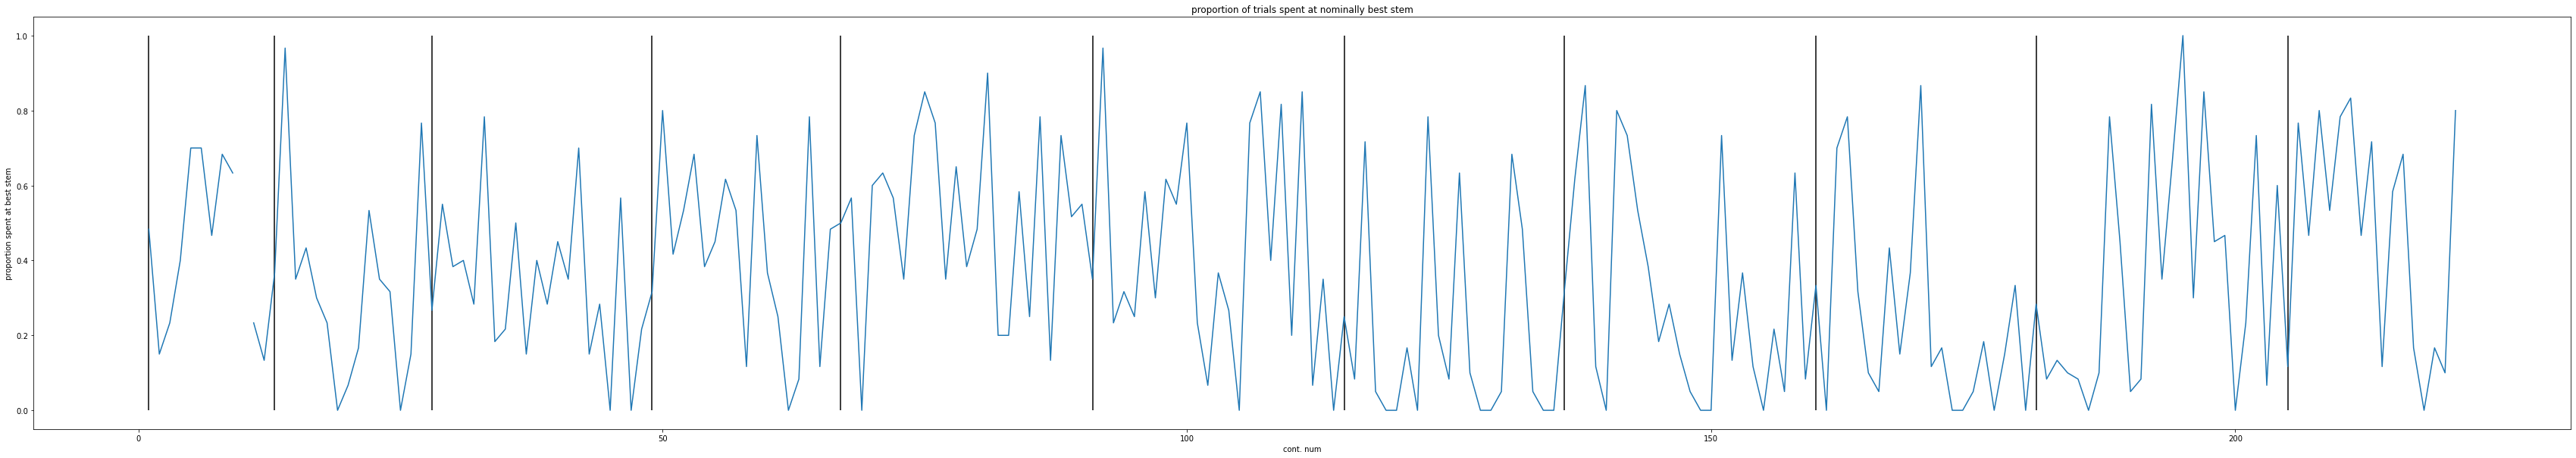

In [17]:
plt.figure(figsize=(60,10))
plt.plot(df_choice['prop_at_best'])
plt.title('proportion of trials spent at nominally best stem')
plt.xlabel("cont. num")
plt.ylabel('proportion spent at best stem')
plt.vlines(df_choice[df_choice['day_chng']].index,0,1,color='k',alpha=1)

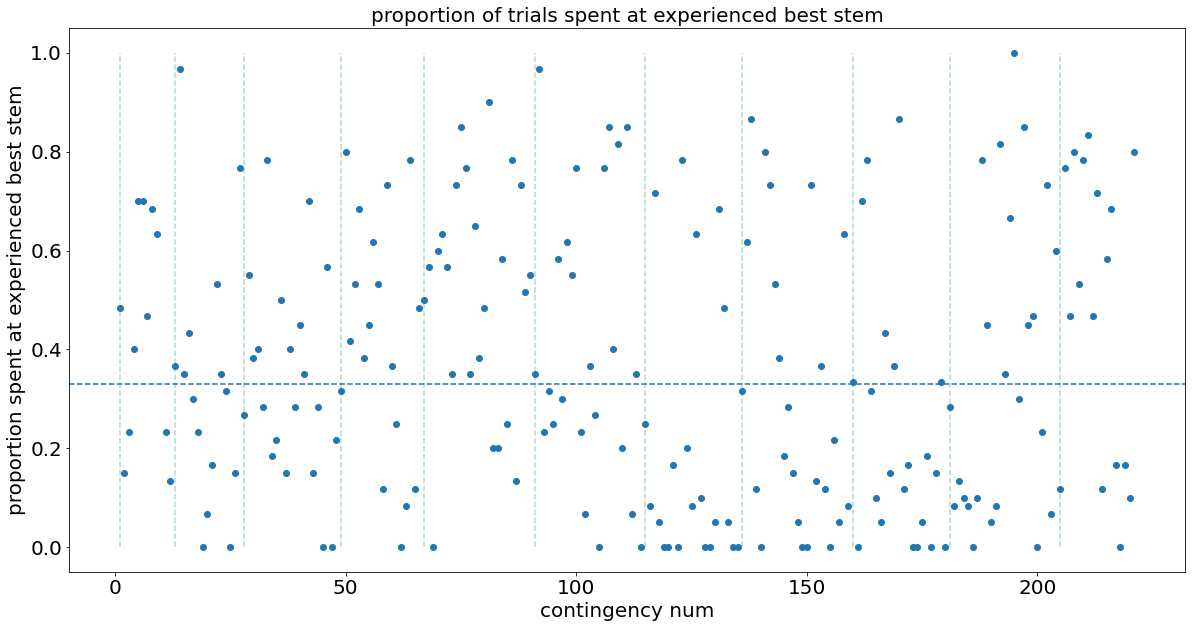

In [20]:
plt.figure(figsize=(20,10))
plt.scatter(df_choice.index,df_choice['prop_at_best'])
plt.title('proportion of trials spent at experienced best stem',fontsize=20)
plt.xlabel("contingency num",fontsize=20)
plt.ylabel('proportion spent at experienced best stem',fontsize=20)
plt.axhline(.33,ls='--')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.vlines(df_choice[df_choice['day_chng']].index,0,1,colors='teal', ls='--',alpha=0.3)

In [19]:
x = df_choice['prop_at_best'].dropna()
z = np.polyfit(x, x, 1)
p = np.poly1d(z)
ax.plot(x,p(x),"r--")

# the line equation:
#print "y=%.6fx+(%.6f)"%(z[0],z[1])

NameError: name 'ax' is not defined

In [ ]:
not_at_best = df_choice[df_choice['prop_at_best']<=.33]
# plt.scatter(not_at_best.index, not_at_best['num_rew'])
# plt.title('when not at best for 33% of cont, how many rew did he get')
plt.hist(not_at_best['glob_nom_avg'],density=True)
plt.title('not performing at chance, what glob_nom_avg-normalized')
plt.xlabel('glob avg')

In [ ]:
at_best = df_choice[df_choice['prop_at_best']>=.66]
at_best
# plt.scatter(at_best.index, at_best['cont_num'])
# plt.title('when at best for 66%% of cont, what cont is it?')
plt.hist(at_best['glob_nom_avg'],density=True)
plt.title('performing better than chance, glob_nom_avg?')
plt.xlabel('glob_nom_avg')

In [ ]:
df_choice